In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', index_col=0,)

In [3]:
df

,0,0.3048,71.3,0.00266337,126.201
800,,,,,
1000,0.0,0.3048,71.3,0.002663,125.201
1250,0.0,0.3048,71.3,0.002663,125.951
1600,0.0,0.3048,71.3,0.002663,127.591
2000,0.0,0.3048,71.3,0.002663,127.461
2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...
2500,15.6,0.1016,39.6,0.052849,110.264
3150,15.6,0.1016,39.6,0.052849,109.254
4000,15.6,0.1016,39.6,0.052849,106.604


In [4]:
df_columns= ['Frequency','Angle of attach', 'Chord length', 'Free stream velocity','Suction side','Pressure Level']

In [5]:
df= pd.read_csv(r'airfoil_self_noise.dat', sep='\t',header=None,names=df_columns)

In [6]:
# df.columns = df_columns

In [7]:
df.head()

,Frequency,Angle of attach,Chord length,Free stream velocity,Suction side,Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
df.isnull().sum()

Frequency               0
Angle of attach         0
Chord length            0
Free stream velocity    0
Suction side            0
Pressure Level          0
dtype: int64

In [9]:
X = df.drop('Pressure Level',axis=1)
y =  df.iloc[:,-1]

In [10]:
X

,Frequency,Angle of attach,Chord length,Free stream velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [11]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: Pressure Level, Length: 1503, dtype: float64

In [13]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sachin.Sen\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
### Train test split 

from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### EDA

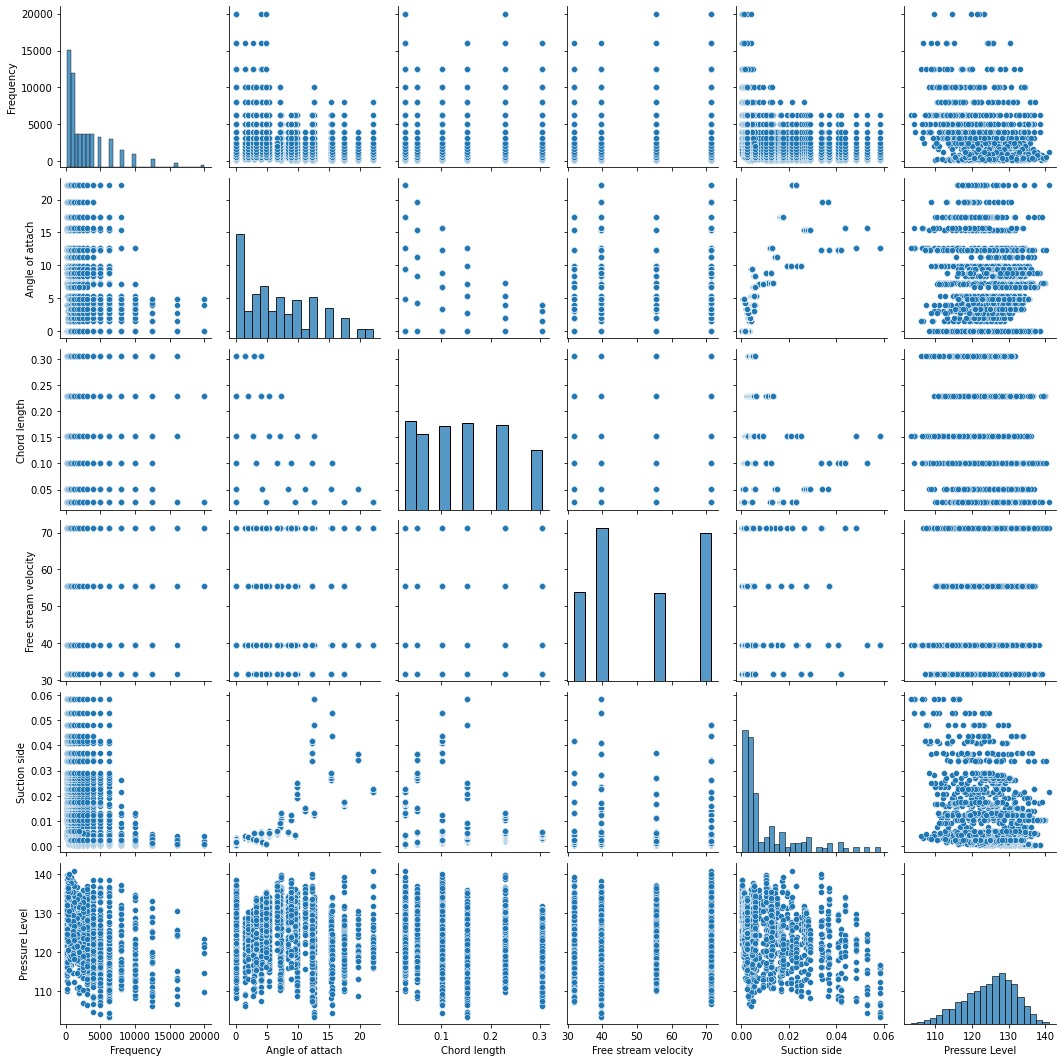

In [ ]:
sns.pairplot(df)

In [ ]:
X_train.corr()

,Frequency,Angle of attach,Chord length,Free stream velocity,Suction side
Frequency,1.000000,-0.274765,-0.000919,0.124310,-0.238811
Angle of attach,-0.274765,1.000000,-0.500583,0.051093,0.761265
Chord length,-0.000919,-0.500583,1.000000,0.009959,-0.224177
Free stream velocity,0.124310,0.051093,0.009959,1.000000,-0.009185
Suction side,-0.238811,0.761265,-0.224177,-0.009185,1.000000


/Users/sachinsen/Desktop/pyhton/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

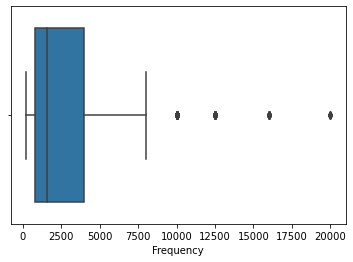

In [ ]:
sns.boxplot(X_train.Frequency)

In [ ]:
len(df['Pressure Level'].unique())

1456

/Users/sachinsen/Desktop/pyhton/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure Level'>

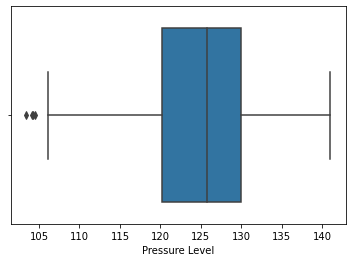

In [ ]:
sns.boxplot(df['Pressure Level'])

In [ ]:
from sklearn.linear_model import LinearRegression

rg = LinearRegression()

rg.fit(X_train,y_train)



LinearRegression()

In [ ]:
rg.predict(X_test)



array([124.06649005, 119.46413909, 120.33254103, 129.60886761,
       129.78612472, 132.64423416, 122.4349038 , 126.74983006,
       130.01045658, 125.98273694, 132.48873564, 113.83051731,
       130.13817923, 132.56057082, 123.65534464, 113.99243741,
       124.34984419, 126.70187871, 129.23000637, 131.83506582,
       125.76768033, 125.00648272, 116.41914989, 129.86629416,
       124.21067831, 124.67311231, 131.6322296 , 124.6043593 ,
       115.64678565, 123.26378128, 125.22302256, 123.89962071,
       125.51202054, 118.6912124 , 121.72209401, 130.96423273,
       131.37300187, 128.30505685, 121.40529584, 117.87341962,
       126.42152289, 128.89466472, 126.40892509, 123.45296426,
       123.11311866, 130.1672403 , 125.09652956, 120.00622727,
       123.17401814, 132.83265792, 128.71305692, 117.79809953,
       123.48169003, 122.52751265, 126.70612854, 120.54580229,
       123.29728962, 128.69414033, 124.25737638, 123.24008395,
       125.43355297, 131.05870029, 126.77173379, 131.40

In [ ]:
rg.score(X_test,y_test)

0.4982726587932874

In [ ]:
### Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
lr.predict(X_test_scaled)

array([124.06649005, 119.46413909, 120.33254103, 129.60886761,
       129.78612472, 132.64423416, 122.4349038 , 126.74983006,
       130.01045658, 125.98273694, 132.48873564, 113.83051731,
       130.13817923, 132.56057082, 123.65534464, 113.99243741,
       124.34984419, 126.70187871, 129.23000637, 131.83506582,
       125.76768033, 125.00648272, 116.41914989, 129.86629416,
       124.21067831, 124.67311231, 131.6322296 , 124.6043593 ,
       115.64678565, 123.26378128, 125.22302256, 123.89962071,
       125.51202054, 118.6912124 , 121.72209401, 130.96423273,
       131.37300187, 128.30505685, 121.40529584, 117.87341962,
       126.42152289, 128.89466472, 126.40892509, 123.45296426,
       123.11311866, 130.1672403 , 125.09652956, 120.00622727,
       123.17401814, 132.83265792, 128.71305692, 117.79809953,
       123.48169003, 122.52751265, 126.70612854, 120.54580229,
       123.29728962, 128.69414033, 124.25737638, 123.24008395,
       125.43355297, 131.05870029, 126.77173379, 131.40

In [ ]:
lr.score(X_test_scaled,y_test)

0.4982726587932882

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
ds = DecisionTreeRegressor()

In [ ]:
ds.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
ds.predict(X_test)

array([122.147, 119.777, 119.598, 133.223, 134.43 , 122.956, 124.685,
       133.174, 139.438, 127.117, 122.79 , 112.251, 133.846, 131.656,
       125.728, 110.124, 130.507, 132.149, 129.002, 125.048, 123.453,
       127.636, 111.029, 122.292, 125.353, 127.73 , 130.197, 132.011,
       110.905, 132.158, 131.364, 121.903, 127.117, 120.324, 118.689,
       133.42 , 135.938, 127.7  , 121.771, 110.264, 124.024, 135.468,
       124.665, 121.225, 128.633, 134.996, 130.43 , 119.135, 121.93 ,
       132.354, 132.611, 114.634, 127.008, 128.335, 126.966, 121.771,
       123.236, 130.033, 122.765, 118.757, 125.524, 134.43 , 129.937,
       134.226, 118.827, 124.166, 125.398, 118.385, 125.809, 129.147,
       130.987, 129.27 , 129.057, 118.113, 129.148, 128.978, 128.679,
       133.211, 131.836, 136.826, 124.685, 119.854, 122.765, 125.261,
       120.324, 118.214, 112.139, 130.964, 116.603, 117.957, 118.134,
       109.951, 122.845, 128.763, 117.154, 117.154, 117.087, 118.113,
       133.261, 127.

In [ ]:
ds.score(X_test,y_test)

0.8124517276953679

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
Ran = ExtraTreesRegressor()

In [ ]:
Ran.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
Ran.predict(X_test)

array([124.13725, 118.6728 , 119.11485, 134.95942, 134.16945, 122.87763,
       124.28277, 135.77306, 133.40415, 127.51078, 126.16285, 113.00946,
       133.59175, 133.47382, 124.31719, 108.15622, 130.53249, 128.99217,
       128.57329, 124.47624, 124.58777, 127.71172, 111.02702, 125.84905,
       124.00126, 125.11524, 127.54609, 131.48101, 109.88016, 131.69384,
       132.52222, 122.79901, 127.58325, 120.00083, 119.80336, 135.69254,
       134.64296, 129.50316, 121.34936, 111.7227 , 125.24235, 134.95135,
       125.99474, 121.42027, 126.50703, 134.36311, 130.36287, 118.033  ,
       121.69685, 133.35655, 132.18848, 114.99066, 128.86096, 128.27419,
       126.51994, 121.40427, 123.44631, 128.93571, 122.44066, 119.34057,
       126.1003 , 134.32964, 130.64465, 133.54795, 117.92451, 125.01393,
       124.80322, 119.66063, 125.48597, 129.53495, 128.99562, 130.4282 ,
       128.22899, 117.53687, 130.16147, 129.39894, 130.31576, 133.01331,
       134.97024, 136.75499, 125.16716, 120.0502 , 

In [ ]:
Ran.score(X_test,y_test)

0.9494310139933838

In [ ]:
y_test

51      125.045
1465    118.767
184     120.233
1000    137.047
746     134.556
         ...   
522     120.534
140     114.042
1085    123.894
1422    118.018
654     119.875
Name: Pressure Level, Length: 451, dtype: float64

In [ ]:
import pickle

In [ ]:
pickle.dump(Ran,open('Random_forest.sav','wb'))

In [ ]:
pickle_model = pickle.load(open('Random_forest.sav','rb'))

In [ ]:
pickle_model.predict(X_train)

array([124.154, 131.458, 127.801, ..., 133.13 , 124.717, 128.978])